In [1]:
##importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing the data using pandas 
data = pd.read_excel('m and f.xlsx')

In [3]:
data.head()

,ht,wt,sex
0,195.9,78.9,f
1,189.7,74.4,f
2,177.8,69.1,f
3,185.0,74.9,f
4,184.6,64.6,f


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ht      201 non-null    float64
 1   wt      201 non-null    float64
 2   sex     201 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [5]:
#Checking any mising values in the given data
data.isnull().sum()

ht     0
wt     0
sex    0
dtype: int64

In [6]:
data.describe()

,ht,wt
count,201.000000,201.000000
mean,180.050746,74.999502
std,9.729302,13.959454
min,148.900000,37.800000
25%,174.000000,66.500000
50%,179.700000,74.400000
75%,186.100000,84.200000
max,209.400000,123.200000


(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

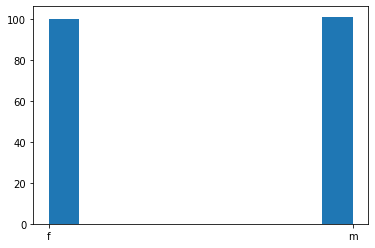

In [7]:
plt.hist(data['sex'])

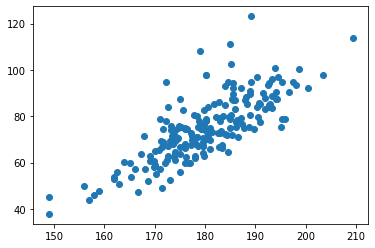

In [8]:
plt.scatter(data['ht'],data['wt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x203d5fff880>,
 'caps': [<matplotlib.lines.Line2D at 0x203d5ffff40>,
 'boxes': [<matplotlib.lines.Line2D at 0x203d5fff520>],
 'medians': [<matplotlib.lines.Line2D at 0x203d6009640>],
 'fliers': [<matplotlib.lines.Line2D at 0x203d60099a0>],
 'means': []}

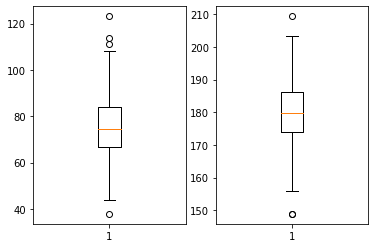

In [9]:
plt.subplot(1,2,2)
plt.boxplot(data['ht'])
plt.subplot(1,2,1)
plt.boxplot(data['wt'])

In [10]:
x = data[['ht','wt']]
y = data['sex']

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=4)

In [64]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [65]:
le =LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [66]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,lr_pred)
cm
print(accuracy_score(y_test,lr_pred)*100,'%')

76.19047619047619 %


In [67]:
import pickle

In [70]:
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lr) 
  
# Load the pickled model 
classifier_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
classifier_from_pickle.predict(x_test) 

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])